In [92]:
import csv
import numpy as np
import os
import pandas as pd
import sys

sys.path.append("../src")
import localmodule


# Define constants.
slurm_dir = "/home/vl1019/BirdVox-70k_icassp2018/sbatch/028_train-median-ntt-convnet/slurm"
bg_durations = [60, 120, 300, 600, 1800, 3600, 7200]
units = localmodule.get_units()
out_names = sorted(os.listdir(slurm_dir))
max_val_accs = np.zeros((len(units), len(bg_durations)))

for unit_id, unit_str in enumerate(units):

    for bg_id, bg_duration in enumerate(bg_durations):
        
        T_str = "T-" + str(bg_duration).zfill(4)

        slurm_prefix = "_".join(["slurm_028", T_str, unit_str])
        out_name = [x for x in out_names if slurm_prefix in x][0]
        out_path = os.path.join(slurm_dir, out_name)

        try:
            with open(out_path, "r") as out_file:
                rows = []
                for row in csv.reader(out_file):
                    rows.append(row)
            rows = rows[-19:-3]
            val_accs = [float(row[0].split("  ")[3]) for row in rows]
            max_val_acc = 100 * max(val_accs)
        except:
            max_val_acc = 50.0
            
        max_val_accs[unit_id, bg_id] = max_val_acc

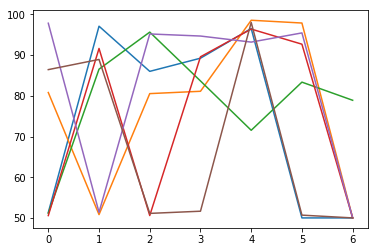

In [97]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(max_val_accs.T);

In [115]:
np.stack([np.min(max_val_accs, axis=0), np.median(max_val_accs, axis=0), np.mean(max_val_accs, axis=0), np.max(max_val_accs, axis=0)])

array([[ 50.5737    ,  50.8179    ,  50.5859    ,  51.6479    ,
         71.5332    ,  50.        ,  50.        ],
       [ 66.07055   ,  87.74415   ,  83.27635   ,  86.4502    ,
         96.46605   ,  88.0249    ,  50.        ],
       [ 69.68586667,  77.73845   ,  76.51771667,  81.65688333,
         92.37875   ,  78.34676667,  54.8177    ],
       [ 97.8394    ,  97.1069    ,  95.6543    ,  94.6899    ,
         98.5718    ,  97.8882    ,  78.9062    ]])

In [118]:
max_val_accs[:, -3]

array([ 96.5332,  98.5718,  71.5332,  96.3989,  93.2007,  98.0347])